<a href="https://colab.research.google.com/github/neel26desai/basic_neural_networks/blob/main/neural_networks_using_tf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
seed = 123
np.random.seed(seed)
tf.random.set_seed(seed)

In [3]:
import tensorflow as tf

# Defining the data
n, d = 500, 3  # 1000 records, 3 features

# Creating x, values will be between -1 and 1 and the shape will be n, d
x = tf.random.uniform((n, d), minval=-1, maxval=1)

# Creating weights that allow us to get the y_true values
weights_true = tf.constant([[1], [3], [1]], dtype=tf.float32)
bias_true = tf.constant([1], dtype=tf.float32)

# Creating an equation  y_true
y_true = tf.einsum('ij,jk->ik', tf.pow(x, 3), weights_true) + \
         tf.einsum('ij,jk->ik', tf.pow(x, 2), weights_true) + \
         tf.einsum('ij,jk->ik', x, weights_true) + bias_true

print(f'x: {x.shape}, weights: {weights_true.shape}, bias: {bias_true.shape}, y: {y_true.shape}')


x: (500, 3), weights: (3, 1), bias: (1,), y: (500, 1)


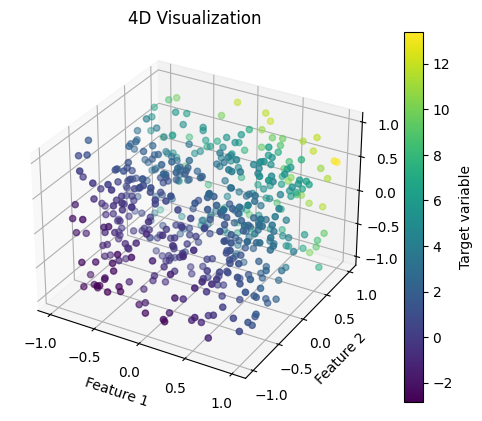

In [4]:
#defining function for visualizaing the data
def visualize_4d_data(x, y_true):
    """
    Visualizes 4D data using a 3D scatter plot with color representing the fourth dimension.

    Args:
    x (numpy.ndarray): Input features with shape (n, 3).
    y_true (numpy.ndarray): Target variable with shape (n, 1).
    """
    x = x.numpy()
    y_true = y_true.numpy()
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(x[:, 0], x[:, 1], x[:, 2], c=y_true.ravel(), cmap='viridis')
    plt.colorbar(scatter, label='Target variable')
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_zlabel('Feature 3')
    plt.title('4D Visualization')
    plt.show()

# Example usage
visualize_4d_data(x, y_true)

In [7]:
#performing a train test split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x.numpy(), y_true.numpy(), test_size=0.2, random_state=seed)
#converting everything back to tensors
x_train = tf.convert_to_tensor(x_train)
x_test = tf.convert_to_tensor(x_test)
y_train = tf.convert_to_tensor(y_train)
y_test = tf.convert_to_tensor(y_test)

In [8]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

(TensorShape([400, 3]),
 TensorShape([400, 1]),
 TensorShape([100, 3]),
 TensorShape([100, 1]))

In [ ]:

import numpy as np

def plot_function_and_predictions_4d(x, y_true, y_pred, output_dim=0, cmap='viridis'):
    """
    Plots the underlying function and the predicted function for a specific output dimension, with the fourth dimension represented by color.

    Args:
    x (numpy.ndarray): Input features with shape (n, 3).
    y_true (numpy.ndarray): True target values with shape (n, 2).
    y_pred (numpy.ndarray): Predicted target values with shape (n, 2).
    output_dim (int): The output dimension to visualize (0 or 1).
    cmap (str): Color map to use for the fourth dimension.
    """
    y_pred = y_pred.numpy() # detach the param from current coputational graph (creating a new tensor) and convert it to numpy
    y_true = y_true.numpy()
    x = x.numpy()
    fig = plt.figure(figsize=(12, 6))

    # Define the color map for the fourth dimension
    norm = plt.Normalize(vmin=min(x[:, 2]), vmax=max(x[:, 2]))
    colors = plt.cm.get_cmap(cmap)(norm(x[:, 2]))

    # Plot the true values
    ax1 = fig.add_subplot(121, projection='3d')
    ax1.scatter(x[:, 0], x[:, 1], y_true[:, output_dim], c=colors, marker='o', label='True')
    ax1.set_xlabel('X1')
    ax1.set_ylabel('X2')
    ax1.set_zlabel(f'Y{output_dim + 1}')
    ax1.set_title('Underlying Function')

    # Plot the predicted values
    ax2 = fig.add_subplot(122, projection='3d')
    ax2.scatter(x[:, 0], x[:, 1], y_pred[:, output_dim], c=colors, marker='^', label='Predicted')
    ax2.set_xlabel('X1')
    ax2.set_ylabel('X2')
    ax2.set_zlabel(f'Y{output_dim + 1}')
    ax2.set_title('Predicted Function')

    # Add a color bar to indicate the fourth dimension
    mappable = plt.cm.ScalarMappable(norm=norm, cmap=cmap)
    mappable.set_array(x[:, 2])
    plt.colorbar(mappable, ax=[ax1, ax2], label='X3 (Fourth Dimension)')

    plt.legend()
    plt.show()

# From Scratch


## Everything from Scratch

In [48]:
import tensorflow as tf

class MSELoss:
    def forward(self, y_pred, y_true):
        self.y_pred = y_pred
        self.y_true = y_true
        return tf.reduce_mean(tf.square(y_pred - y_true))

    def backward(self):
        return 2 * (self.y_pred - self.y_true) / tf.size(self.y_true, out_type=tf.float32)


class ReLu:
    def __init__(self):
        self.x = None

    def __call__(self, x):
        self.x = x
        return tf.maximum(0.0, x)

    def backward(self, grad_output):
        grad_input = grad_output * tf.cast(self.x > 0, tf.float32)
        return grad_input


class LinearLayer:
    def __init__(self, input_dim, output_dim):
        self.weights = tf.Variable(tf.random.normal([input_dim, output_dim]) * tf.sqrt(2.0 / input_dim), trainable=True)
        self.bias = tf.Variable(tf.zeros([output_dim]), trainable=True)

    def __call__(self, x):
        self.x = x
        return tf.einsum('ij,jk->ik', x, self.weights) + self.bias

    def backward(self, grad_output):
        grad_input = tf.einsum('ij,kj->ik', grad_output, self.weights)
        grad_weights = tf.einsum('ki,kj->ij', self.x, grad_output)
        grad_bias = tf.reduce_sum(grad_output, axis=0)
        return grad_input, grad_weights, grad_bias

    def update(self, lr, grad_weights, grad_bias):
        self.weights.assign_sub(lr * grad_weights)
        self.bias.assign_sub(lr * grad_bias)


class NeuralNetwork:
    def __init__(self, input_dim, hidden_dim, output_dim):
        self.layers = [
            LinearLayer(input_dim, hidden_dim),
            ReLu(),
            LinearLayer(hidden_dim, hidden_dim),
            ReLu(),
            LinearLayer(hidden_dim, output_dim)
        ]
        self.loss = MSELoss()

    def __call__(self, x):
        return self.forward(x)

    def forward(self, x):
        for layer in self.layers:
            x = layer(x)
        return x

    def backward(self, grad_output):
        for layer in reversed(self.layers):
            if isinstance(layer, LinearLayer):
                grad_output, grad_weights, grad_bias = layer.backward(grad_output)
                layer.grad_weights = grad_weights
                layer.grad_bias = grad_bias
            elif isinstance(layer, ReLu):
                grad_output = layer.backward(grad_output)
        return grad_output

    def update(self, lr):
        for layer in self.layers:
            if isinstance(layer, LinearLayer):
                layer.update(lr, layer.grad_weights, layer.grad_bias)


def fit(x: tf.Tensor, y: tf.Tensor, model: NeuralNetwork, loss: MSELoss, lr: float, num_epochs: int):
    loss_history = []
    for epoch in range(num_epochs):
        with tf.GradientTape() as tape:
            y_pred = model(x)
            loss_value = loss.forward(y_pred, y)
        loss_history.append(loss_value.numpy())
        print(f'Epoch {epoch + 1}, loss {loss_value.numpy()}')
        gradient_from_loss = loss.backward()
        model.backward(gradient_from_loss)
        model.update(lr)
    return loss_history


In [53]:
# Create a neural network model
nn = NeuralNetwork(input_dim=3, hidden_dim=64, output_dim=1)
# Define the loss
loss = MSELoss()
# Fit the model
loss_history = fit(x_train, y_train, model=nn, loss=loss, lr=0.01, num_epochs=10)


Epoch 1, loss 16.366554260253906
Epoch 2, loss 11.219910621643066
Epoch 3, loss 9.23752212524414
Epoch 4, loss 7.997637748718262
Epoch 5, loss 7.017950534820557
Epoch 6, loss 6.176913261413574
Epoch 7, loss 5.429516792297363
Epoch 8, loss 4.767905235290527
Epoch 9, loss 4.179436206817627
Epoch 10, loss 3.658505439758301


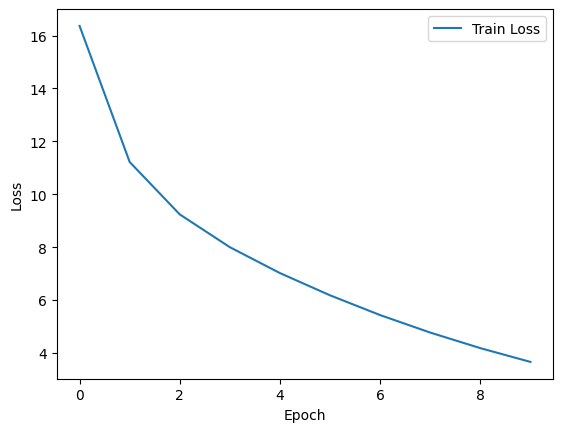

In [54]:
#plotting the train and validate loss
plt.plot(loss_history, label='Train Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [59]:
#making predicction on test set
y_pred = nn(x_test)
print(loss.forward(y_pred,y_test).numpy())

4.743224


<ipython-input-28-0863fcc41f12>:21: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap(cmap)(norm(x[:, 2]))


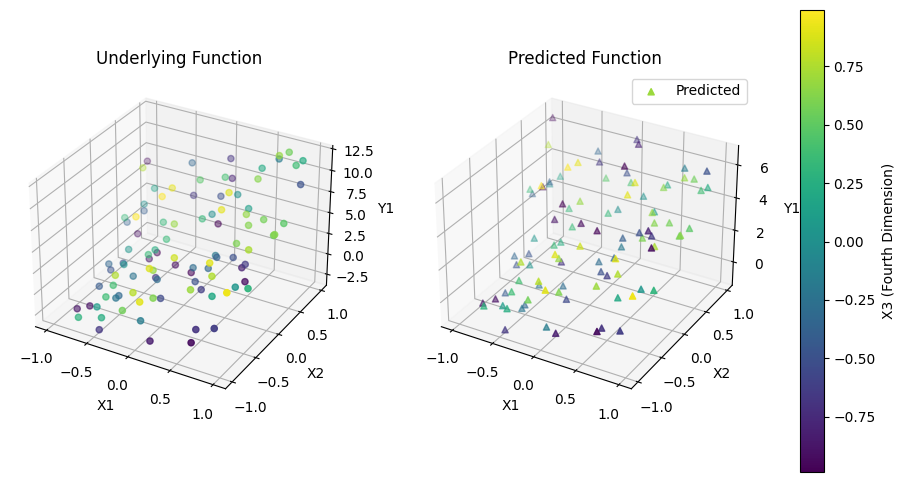

In [60]:
#plotting the underlying function and the predicted values
plot_function_and_predictions_4d(x_test,y_test,y_pred)

## Using gradient tape

In [22]:
class Model:
  def __init__(self, input_dim, output_dim):
    self.w1 = tf.Variable(tf.random.normal([input_dim, 64]), name='w1')
    self.b1 = tf.Variable(tf.zeros([64]), name='b1')
    self.w2 = tf.Variable(tf.random.normal([64, 64]), name='w2')
    self.b2 = tf.Variable(tf.zeros([64]), name='b2')
    self.w3 = tf.Variable(tf.random.normal([64, output_dim]), name='w3')
    self.b3 = tf.Variable(tf.zeros([output_dim]), name='b3')

  def __call__(self, x):
    x = tf.einsum('ij,jk->ik', x, self.w1) + self.b1
    x = tf.nn.relu(x)
    x = tf.einsum('ij,jk->ik', x, self.w2) + self.b2
    x = tf.nn.relu(x)
    x = tf.einsum('ij,jk->ik', x, self.w3) + self.b3
    return x

  def loss_fn(self, y_pred, y_true):
    return tf.reduce_mean(tf.square(y_pred - y_true))

  def train(self, x, y_true,x_test,y_test,learning_rate=0.001, epochs=100):
    train_loss_history = []
    validation_loss_history = []

    for epoch in range(epochs):
        with tf.GradientTape() as tape:
            y_pred = self(x)
            loss = self.loss_fn(y_pred, y_true)
            val_loss = self.validate(x_test, y_test)

        gradients = tape.gradient(loss, self.trainable_variables())

        self.w1.assign_sub(learning_rate * gradients[0])
        self.b1.assign_sub(learning_rate * gradients[1])
        self.w2.assign_sub(learning_rate * gradients[2])
        self.b2.assign_sub(learning_rate * gradients[3])
        self.w3.assign_sub(learning_rate * gradients[4])
        self.b3.assign_sub(learning_rate * gradients[5])

        train_loss_history.append(loss.numpy())
        validation_loss_history.append(val_loss)
        if epoch % 10 == 0:
            print(f'Epoch {epoch}, Loss: {loss.numpy()}')
    return {'train_loss': train_loss_history,'validation_loss':validation_loss_history}

  def trainable_variables(self):
    return [self.w1, self.b1, self.w2, self.b2, self.w3, self.b3]

  def validate(self, x, y_true):
    y_pred = self(x)
    loss = self.loss_fn(y_pred, y_true)
    return loss.numpy()

In [23]:
#training the model
model = Model(input_dim=3, output_dim=1)
history = model.train(x_train, y_train, x_test,y_test,learning_rate=0.001, epochs=100)

Epoch 0, Loss: 449.9507141113281
Epoch 10, Loss: 7.815274715423584
Epoch 20, Loss: 5.464800834655762
Epoch 30, Loss: 4.208353042602539
Epoch 40, Loss: 3.391876220703125
Epoch 50, Loss: 2.819390296936035
Epoch 60, Loss: 2.4083220958709717
Epoch 70, Loss: 2.1033811569213867
Epoch 80, Loss: 1.869372844696045
Epoch 90, Loss: 1.6848427057266235


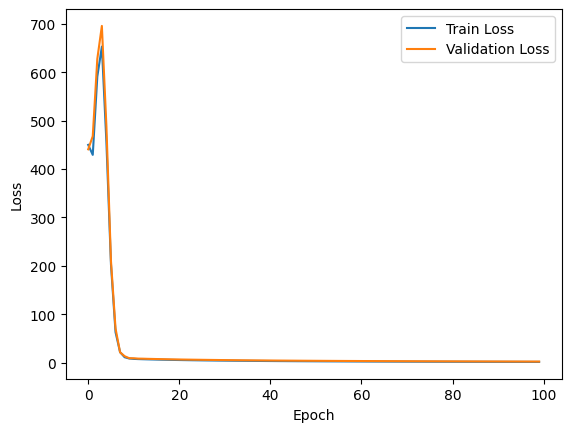

In [24]:
#plotting the train and validate loss
plt.plot(history['train_loss'], label='Train Loss')
plt.plot(history['validation_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [25]:
#making prediction on test data and calculating the loss
y_pred = model(x_test)
loss = model.loss_fn(y_pred, y_test)
print(f'Test Loss: {loss.numpy()}')

Test Loss: 2.279123544692993


<ipython-input-28-0863fcc41f12>:21: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap(cmap)(norm(x[:, 2]))


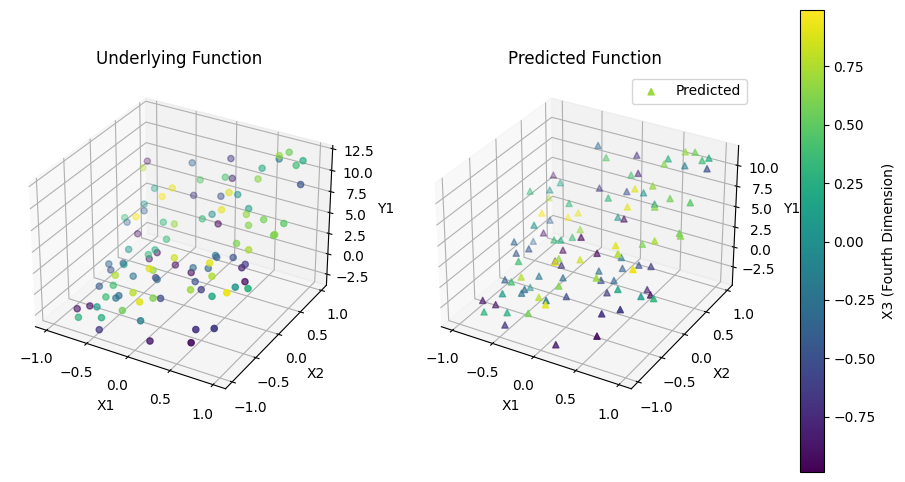

In [29]:
#plotting the underlying function and the predicted values
plot_function_and_predictions_4d(x_test,y_test,y_pred)

# Using Low Level APIs
Using Subclassins and Optimizers

In [42]:
import tensorflow as tf

class DenseLayer(tf.Module):
    def __init__(self, input_dim, output_dim, activation=None):
        self.w = tf.Variable(tf.random.normal([input_dim, output_dim]), name='w')
        self.b = tf.Variable(tf.zeros([output_dim]), name='b')
        self.activation = activation

    def __call__(self, x):
        x = tf.einsum('ij,jk->ik', x, self.w) + self.b
        if self.activation:
            x = self.activation(x)
        return x

class MyModel(tf.Module):
  def __init__(self, input_dim, hidden_dim,output_dim):
    self.layer1 = DenseLayer(input_dim, hidden_dim, activation=tf.nn.relu)
    self.layer2 = DenseLayer(hidden_dim, hidden_dim, activation=tf.nn.relu)
    self.output_layer = DenseLayer(hidden_dim, output_dim)
    self.optimizer = None

  def __call__(self, x):
    x = self.layer1(x)
    x = self.layer2(x)
    x = self.output_layer(x)
    return x

  def loss_fn(self, y_pred, y_true):
    return tf.reduce_mean(tf.square(y_pred - y_true))

  def validate(self, x, y_true):
    y_pred = self(x)
    loss = self.loss_fn(y_pred, y_true)
    return loss.numpy()

  def train(self, x_train, y_train, x_test,y_test,epochs=100,learning_rate=0.001):
    train_loss_history = []
    validation_loss_history = []
    for epoch in range(epochs):
      with tf.GradientTape() as tape:
          y_pred = self(x_train)
          loss = self.loss_fn(y_pred, y_train)
          train_loss_history.append(loss)
          validation_loss_history.append(self.validate(x_test,y_test))
      self.optimizer = tf.optimizers.SGD(learning_rate)
      gradients = tape.gradient(loss, self.trainable_variables)
      self.optimizer.apply_gradients(zip(gradients, self.trainable_variables))

      if epoch % 10 == 0:
          print(f'Epoch {epoch}, Loss: {loss.numpy()}')

    return {'train_loss':train_loss_history,'validation_loss':validation_loss_history}



In [43]:
input_dim = 3
output_dim = 1
hidden_dim = 10
# Instantiate and train the model
model = MyModel(input_dim,hidden_dim,output_dim)
history = model.train(x_train, y_train, x_test, y_test,epochs=100)


Epoch 0, Loss: 18.365495681762695
Epoch 10, Loss: 12.6982421875
Epoch 20, Loss: 9.366772651672363
Epoch 30, Loss: 7.3027472496032715
Epoch 40, Loss: 5.937051773071289
Epoch 50, Loss: 5.020257949829102
Epoch 60, Loss: 4.379287242889404
Epoch 70, Loss: 3.919527530670166
Epoch 80, Loss: 3.5815634727478027
Epoch 90, Loss: 3.326179265975952


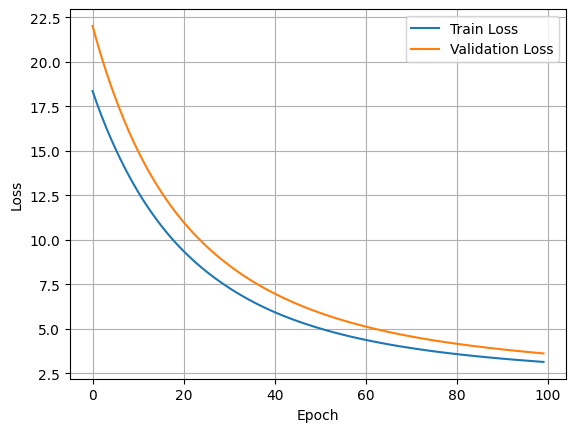

In [44]:
#plotting the train and validate loss
plt.grid()
plt.plot(history['train_loss'], label='Train Loss')
plt.plot(history['validation_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [45]:
#making prediction on test data and calculating the loss
y_pred = model(x_test)
loss = model.loss_fn(y_pred, y_test)
print(f'Test Loss: {loss.numpy()}')

Test Loss: 3.598323345184326


<ipython-input-28-0863fcc41f12>:21: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap(cmap)(norm(x[:, 2]))


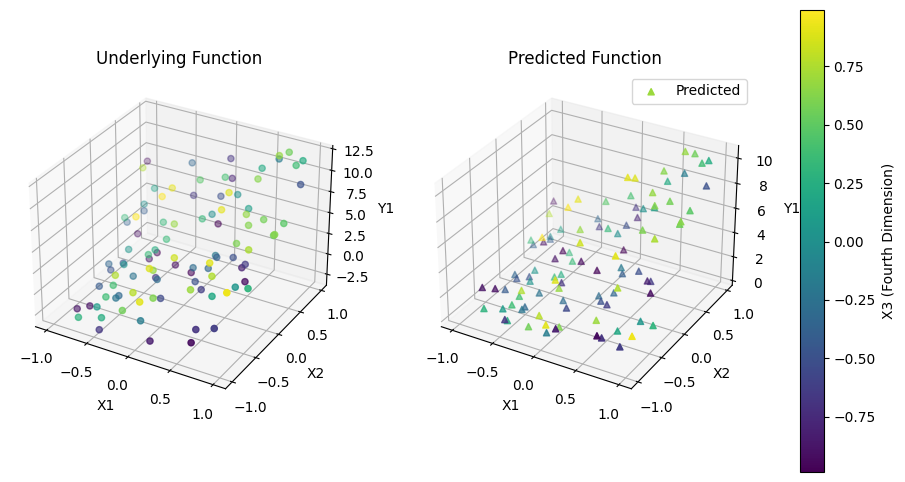

In [46]:
#plotting the underlying function and the predicted values
plot_function_and_predictions_4d(x_test,y_test,y_pred)

# Using Built layers

In [64]:
import tensorflow as tf

class MyModel(tf.keras.Model):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(MyModel, self).__init__()
        self.dense1 = tf.keras.layers.Dense(hidden_dim, activation='relu', input_shape=(input_dim,))
        self.dense2 = tf.keras.layers.Dense(hidden_dim, activation='relu')
        self.dense3 = tf.keras.layers.Dense(output_dim)

    def call(self, inputs):
        x = self.dense1(inputs)
        x = self.dense2(x)
        x = self.dense3(x)
        return x


In [66]:
# Example usage
input_dim = 3
hidden_dim = 64
output_dim = 1

model = MyModel(input_dim, hidden_dim, output_dim)

# Compile and train the model with validation
model.compile(optimizer='sgd', loss='mean_squared_error')
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))


Epoch 1/10
13/13 [==============================] - 1s 24ms/step - loss: 12.7500 - val_loss: 10.7673
Epoch 2/10
13/13 [==============================] - 0s 8ms/step - loss: 5.4577 - val_loss: 3.8377
Epoch 3/10
13/13 [==============================] - 0s 7ms/step - loss: 2.4093 - val_loss: 1.8610
Epoch 4/10
13/13 [==============================] - 0s 10ms/step - loss: 1.3554 - val_loss: 1.1775
Epoch 5/10
13/13 [==============================] - 0s 9ms/step - loss: 1.0413 - val_loss: 0.9674
Epoch 6/10
13/13 [==============================] - 0s 6ms/step - loss: 0.8919 - val_loss: 0.8327
Epoch 7/10
13/13 [==============================] - 0s 5ms/step - loss: 0.8072 - val_loss: 0.7411
Epoch 8/10
13/13 [==============================] - 0s 5ms/step - loss: 0.7259 - val_loss: 0.6855
Epoch 9/10
13/13 [==============================] - 0s 6ms/step - loss: 0.6724 - val_loss: 0.6210
Epoch 10/10
13/13 [==============================] - 0s 5ms/step - loss: 0.6162 - val_loss: 0.5609


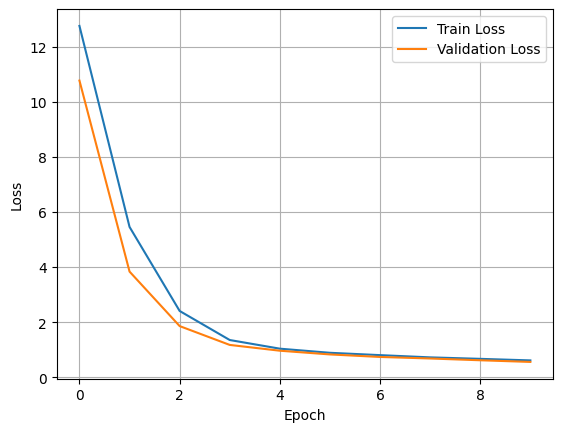

In [69]:
#plotting the train and validate loss
plt.grid()
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [70]:
#making prediction
y_pred = model.predict(x_test)
loss = model.evaluate(x_test, y_test)
print(f'Test Loss: {loss}')

4/4 [==============================] - 0s 4ms/step - loss: 0.5609
Test Loss: 0.5609068870544434


In [75]:
# converting y_pred to tensor,so that we can reuse our visualization fuction
y_pred = tf.convert_to_tensor(y_pred)

<ipython-input-28-0863fcc41f12>:21: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap(cmap)(norm(x[:, 2]))


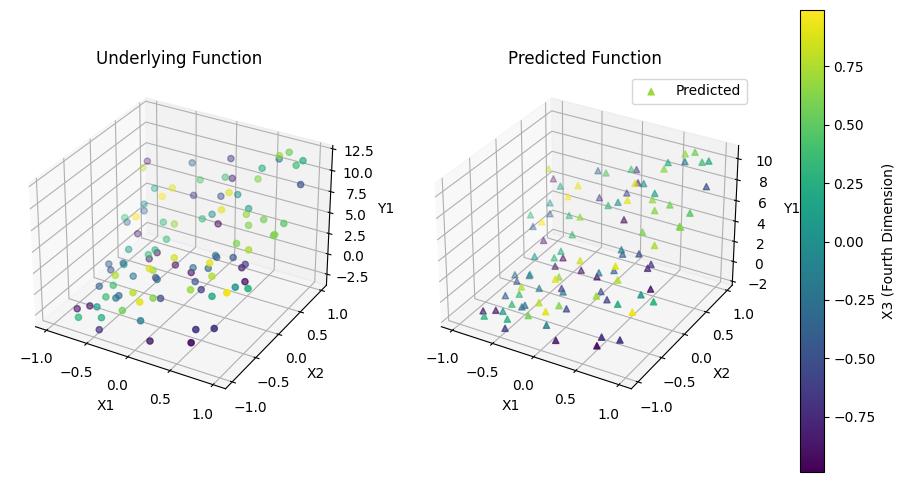

In [76]:
#visualizing the underlying distribution
plot_function_and_predictions_4d(x_test,y_test,y_pred)

# Using the Functional API

In [80]:
import tensorflow as tf


input_dim = 3
hidden_dim = 64
output_dim = 1

# Define the input layer
input_layer = tf.keras.Input(shape=(input_dim,))

# Define the hidden layers and output layer
x = tf.keras.layers.Dense(hidden_dim, activation='relu')(input_layer)
x = tf.keras.layers.Dense(hidden_dim, activation='relu')(x)
output_layer = tf.keras.layers.Dense(output_dim)(x)


In [81]:
# Create the model
model = tf.keras.Model(inputs=input_layer, outputs=output_layer)
# Compile and train the model with validation
model.compile(optimizer='sgd', loss='mean_squared_error')
history=model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))


Epoch 1/10
13/13 [==============================] - 1s 17ms/step - loss: 14.0007 - val_loss: 14.4427
Epoch 2/10
13/13 [==============================] - 0s 5ms/step - loss: 8.4353 - val_loss: 7.3977
Epoch 3/10
13/13 [==============================] - 0s 6ms/step - loss: 4.1344 - val_loss: 3.1664
Epoch 4/10
13/13 [==============================] - 0s 4ms/step - loss: 1.9093 - val_loss: 1.5556
Epoch 5/10
13/13 [==============================] - 0s 6ms/step - loss: 1.2075 - val_loss: 1.1296
Epoch 6/10
13/13 [==============================] - 0s 6ms/step - loss: 0.9710 - val_loss: 0.9095
Epoch 7/10
13/13 [==============================] - 0s 5ms/step - loss: 0.8702 - val_loss: 0.8029
Epoch 8/10
13/13 [==============================] - 0s 6ms/step - loss: 0.7845 - val_loss: 0.7557
Epoch 9/10
13/13 [==============================] - 0s 5ms/step - loss: 0.7220 - val_loss: 0.6780
Epoch 10/10
13/13 [==============================] - 0s 5ms/step - loss: 0.6620 - val_loss: 0.6176


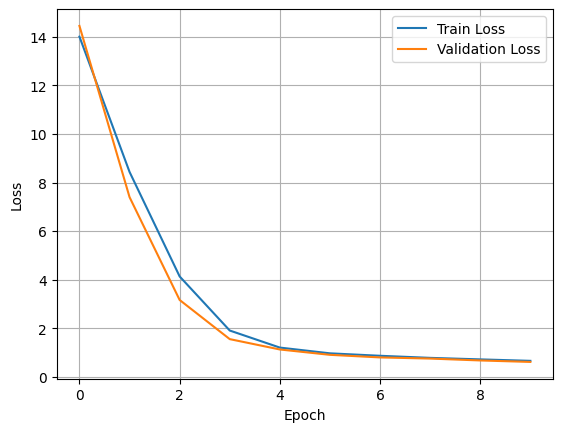

In [82]:
#plotting the train and validate loss
plt.grid()
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [83]:
#making prediction
y_pred = model.predict(x_test)
loss = model.evaluate(x_test, y_test)
print(f'Test Loss: {loss}')

4/4 [==============================] - 0s 5ms/step - loss: 0.6176
Test Loss: 0.6175894737243652


In [84]:
# converting y_pred to tensor,so that we can reuse our visualization fuction
y_pred = tf.convert_to_tensor(y_pred)

<ipython-input-28-0863fcc41f12>:21: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap(cmap)(norm(x[:, 2]))


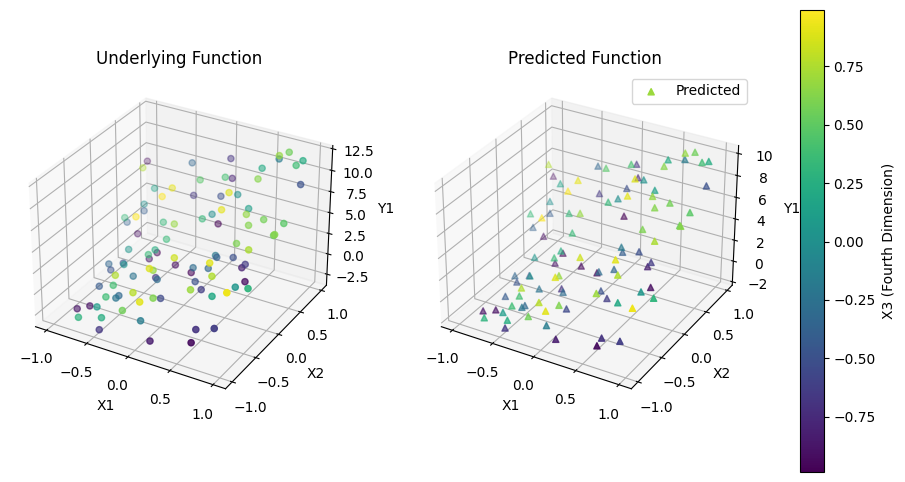

In [85]:
#visualizing the underlying distribution
plot_function_and_predictions_4d(x_test,y_test,y_pred)

# Using Sequential API / High Level API only

Working with the MNIST dataset

In [99]:
import tensorflow as tf

# Load the MNIST digits dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the data
x_train, x_test = x_train / 255.0, x_test / 255.0


11490434/11490434 [==============================] - 0s 0us/step


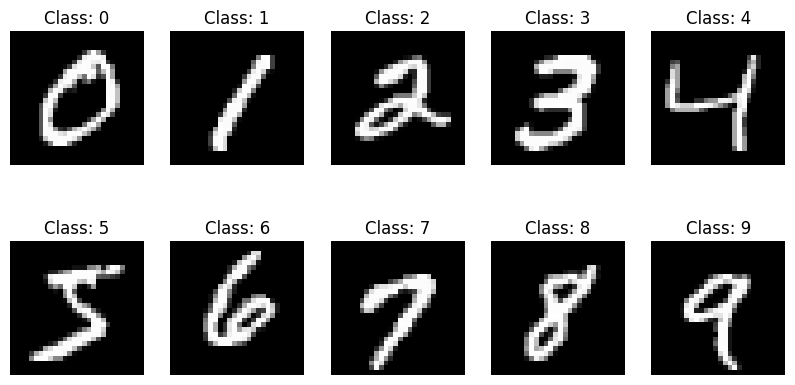

In [100]:
import matplotlib.pyplot as plt
import numpy as np

# Visualize samples for each class
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i in range(10):
    idx = np.where(y_train == i)[0][0]
    ax = axes[i // 5, i % 5]
    ax.imshow(x_train[idx], cmap='gray')
    ax.set_title(f"Class: {i}")
    ax.axis('off')
plt.show()


In [101]:
# 4-layer neural network
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [103]:

# Compile the model
model.compile(optimizer='adam',
                       loss='sparse_categorical_crossentropy',
                       metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10, validation_split=0.2)


Epoch 1/10
1500/1500 [==============================] - 9s 5ms/step - loss: 0.2787 - accuracy: 0.9188 - val_loss: 0.1374 - val_accuracy: 0.9588
Epoch 2/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1125 - accuracy: 0.9659 - val_loss: 0.1177 - val_accuracy: 0.9638
Epoch 3/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0794 - accuracy: 0.9754 - val_loss: 0.1041 - val_accuracy: 0.9680
Epoch 4/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0616 - accuracy: 0.9806 - val_loss: 0.1109 - val_accuracy: 0.9673
Epoch 5/10
1500/1500 [==============================] - 16s 11ms/step - loss: 0.0503 - accuracy: 0.9838 - val_loss: 0.0946 - val_accuracy: 0.9734
Epoch 6/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0402 - accuracy: 0.9872 - val_loss: 0.1082 - val_accuracy: 0.9711
Epoch 7/10
1500/1500 [==============================] - 11s 7ms/step - loss: 0.0338 - accuracy: 0.9890 - val_loss: 0.1089 - val_accura

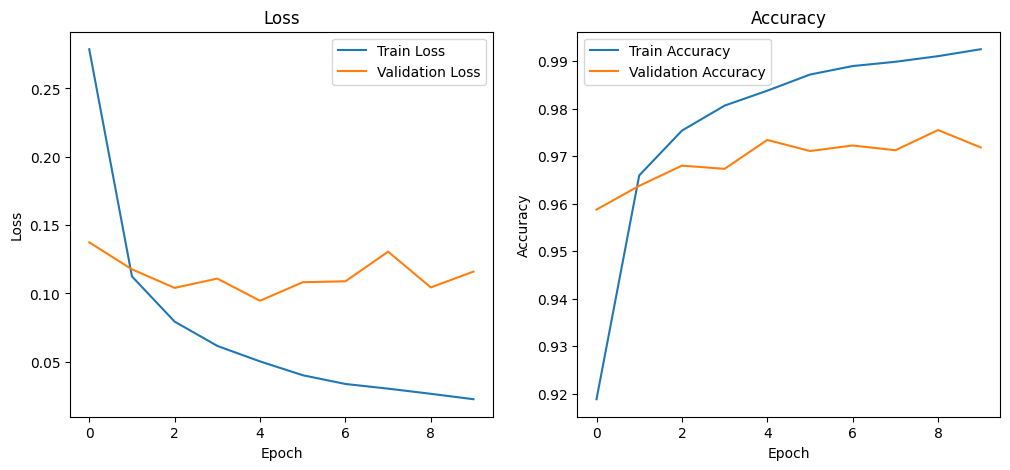

In [104]:
# Visualize the training and validation loss and accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


313/313 [==============================] - 1s 4ms/step


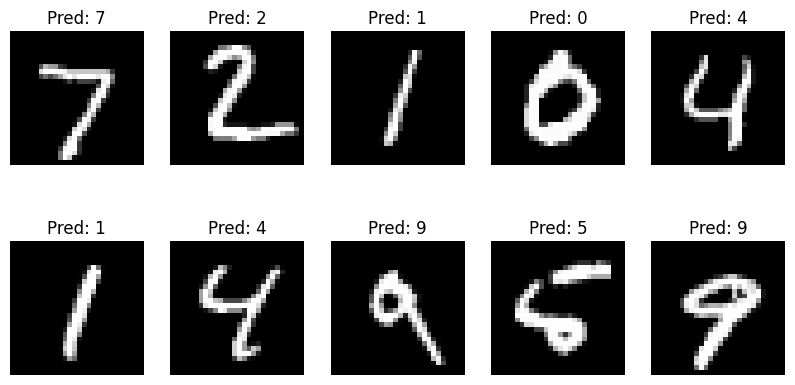

In [105]:
# Make predictions on the test set
predictions = model.predict(x_test)

# Convert predictions to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Visualize some predictions
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.flatten()):
    ax.imshow(x_test[i], cmap='gray')
    ax.set_title(f"Pred: {predicted_labels[i]}")
    ax.axis('off')
plt.show()
